# Importación de librerias

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd
import gc

In [211]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
sns.set_context("notebook", rc={"figure.figsize": (12, 6)})

# Carga de datasets

In [212]:
path_products = './datasets/tb_productos.txt'
path_stocks = './datasets/tb_stocks.txt'
path_sells = './datasets/sell-in.txt'
path_products_to_predict = './datasets/product_id_apredecir201912.txt'

In [213]:
dataset_final_path = './df_final.csv'

In [214]:
#path_products = 'https://drive.usercontent.google.com/u/0/uc?id=1s-AqqbU8AkCquQSTabKQcSyTWJxfzWdC&export=download'
#path_stocks = 'https://drive.usercontent.google.com/u/0/uc?id=1hWem2eGQuxKvRLYowsEr7kEeBLqJMh9y&export=download'
#path_sells = 'https://drive.usercontent.google.com/download?id=1a51g5fWTolz8ffJzqOraoFBbpMrDxDSo&export=download&authuser=0&confirm=t&uuid=7b59490c-94b4-4e15-9493-2679ad9211b6&at=ALoNOgm-5Vr0oaK-fRAcN97ldtSW%3A1748109329167'

In [215]:
df_products = pd.read_csv(path_products, sep='\t', dtype={ 'product_id': str, 'sku_size': str })
df_stocks = pd.read_csv(path_stocks, sep='\t', dtype={ 'product_id': str, 'periodo': str })
df_sell_in = pd.read_csv(path_sells, sep='\t', dtype={ 'product_id': str, 'customer_id': str, 'periodo': str })

# EDA

## Análisis individual de los datasets

### Productos

In [216]:
df_products.head(10)

,cat1,cat2,cat3,brand,sku_size,product_id
0,HC,ROPA LAVADO,Liquido,LIMPIEX,900,20280
1,HC,ROPA LAVADO,Liquido,LIMPIEX,450,20180
2,HC,ROPA LAVADO,Liquido,LIMPIEX,120,20332
3,HC,ROPA LAVADO,Liquido,LIMPIEX,450,20222
4,HC,ROPA LAVADO,Liquido,LIMPIEX,900,20288
5,HC,ROPA LAVADO,Liquido,LIMPIEX,900,20582
6,HC,ROPA LAVADO,Liquido,LIMPIEX,450,20507
7,HC,ROPA LAVADO,Liquido,LIMPIEX,500,20740
8,HC,ROPA MANCHAS,Ladrillo,LIMPIEX,200,20082
9,HC,ROPA MANCHAS,Ladrillo,LIMPIEX,200,20039


In [217]:
df_products.dtypes

cat1          object
cat2          object
cat3          object
brand         object
sku_size      object
product_id    object
dtype: object

In [218]:
df_products.describe(include=['object'])

,cat1,cat2,cat3,brand,sku_size,product_id
count,1262,1262,1262,1262,1262,1262
unique,4,15,99,37,78,1251
top,PC,CABELLO,SHAMPOO,NIVEA,200,20278
freq,723,354,146,194,108,2


In [219]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cat1        1262 non-null   object
 1   cat2        1262 non-null   object
 2   cat3        1262 non-null   object
 3   brand       1262 non-null   object
 4   sku_size    1262 non-null   object
 5   product_id  1262 non-null   object
dtypes: object(6)
memory usage: 59.3+ KB


In [220]:
unique_products = df_products['product_id'].nunique()
print(f'Cantidad de productos: {unique_products}')

Cantidad de productos: 1251


In [221]:
duplicated = df_products.duplicated()
df_products.iloc[duplicated[duplicated == True].index]

,cat1,cat2,cat3,brand,sku_size,product_id
37,HC,ROPA LAVADO,Polvo,LIMPIEX,400,20010
39,HC,ROPA LAVADO,Polvo,LIMPIEX,800,20022
42,HC,ROPA LAVADO,Polvo,LIMPIEX,400,20021
44,HC,ROPA LAVADO,Polvo,LIMPIEX,800,20020
542,FOODS,SOPAS Y CALDOS,Caldo Cubo,MAGGI,2,20278
551,FOODS,SOPAS Y CALDOS,Caldo Cubo,MAGGI,2,20192
553,FOODS,SOPAS Y CALDOS,Caldo Cubo,MAGGI,12,20037
646,FOODS,SOPAS Y CALDOS,Salsas Wet,MAGGI,350,20105
900,FOODS,ADEREZOS,Mostaza,MOSTAZA1,60,20100


In [222]:
df_products.isnull().sum()

cat1          0
cat2          0
cat3          0
brand         0
sku_size      0
product_id    0
dtype: int64

<Axes: xlabel='cat1'>

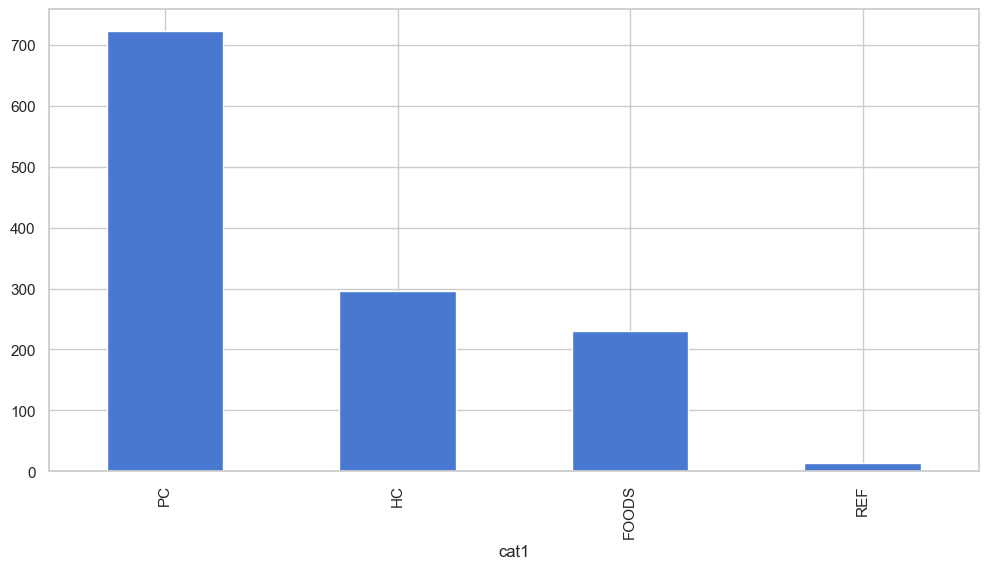

In [223]:
cat1_value_counts = df_products['cat1'].value_counts()
cat1_value_counts.plot(kind='bar')

<Axes: xlabel='cat2'>

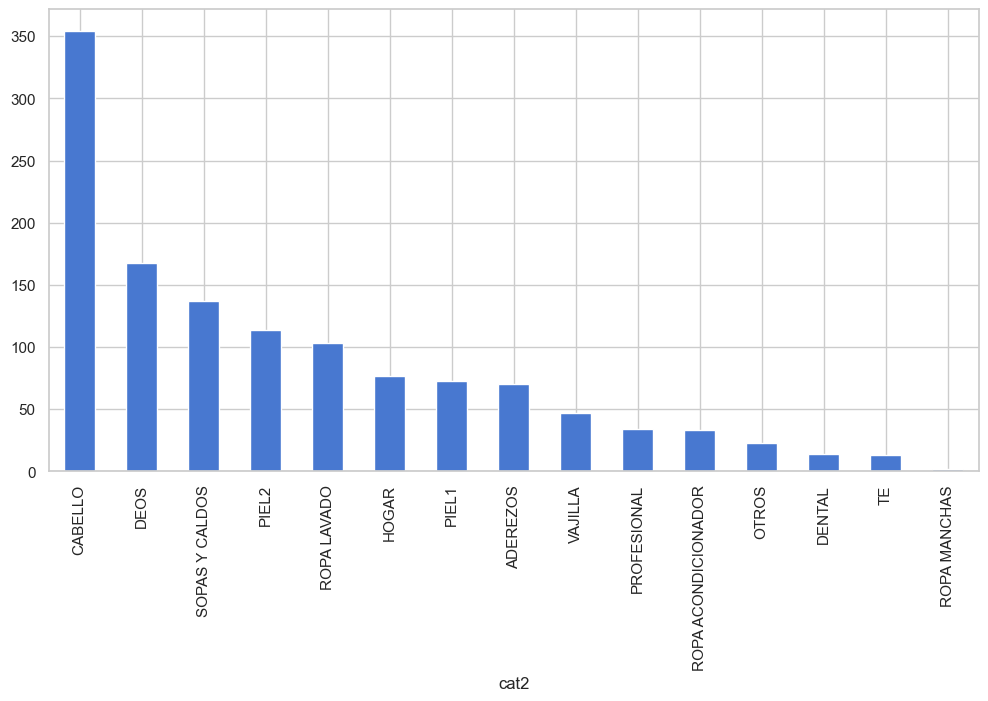

In [224]:
cat2_value_counts = df_products['cat2'].value_counts()
cat2_value_counts.plot(kind='bar')

<Axes: xlabel='cat3'>

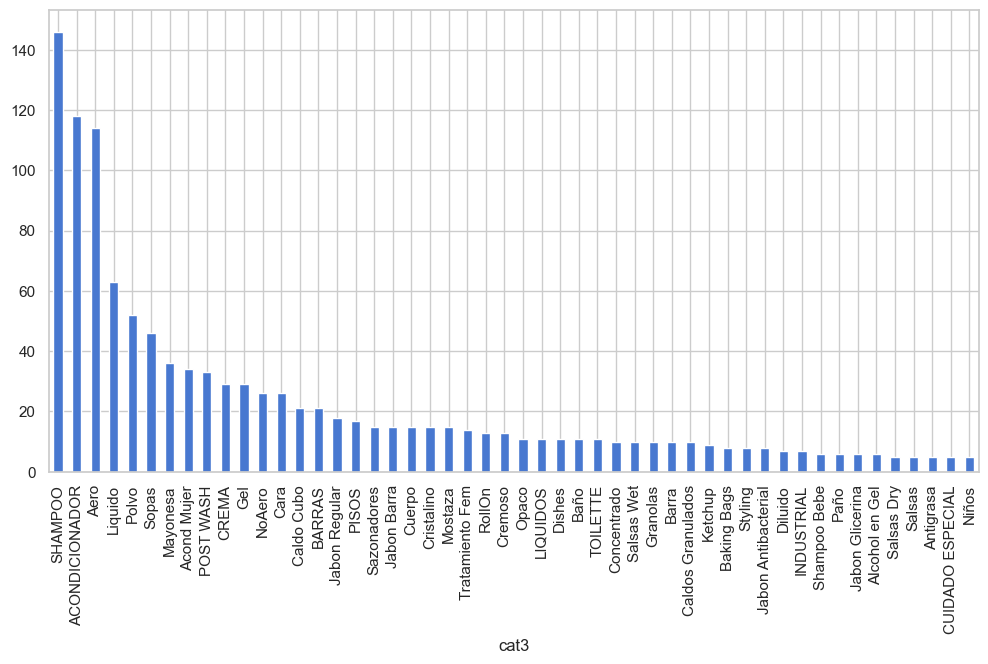

In [225]:
cat3_value_counts = df_products['cat3'].value_counts()
cat3_value_counts.head(50).plot(kind='bar')

<Axes: xlabel='brand'>

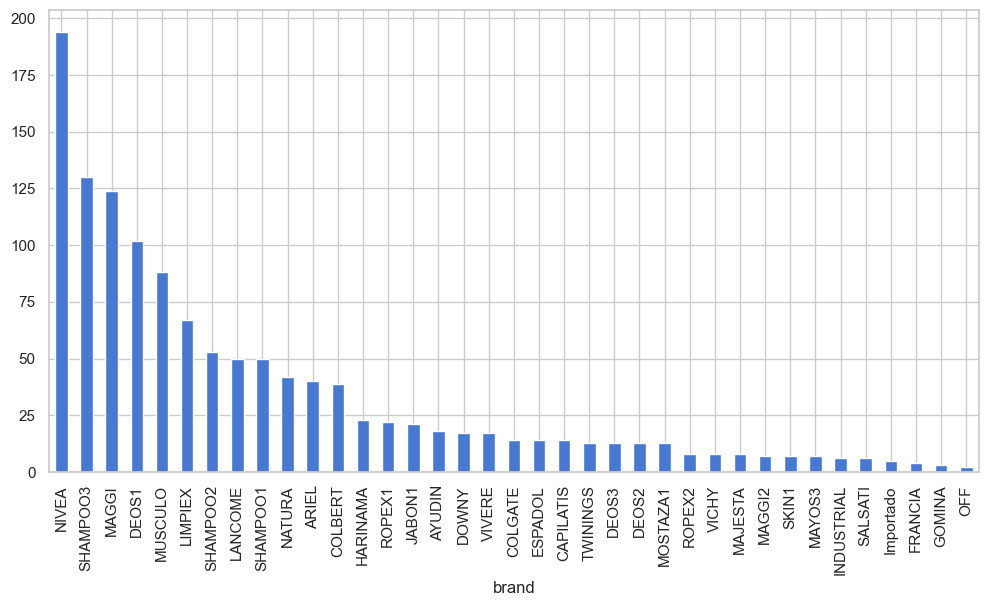

In [226]:
brand_value_counts = df_products['brand'].value_counts()
brand_value_counts.plot(kind='bar')

### Stocks

In [227]:
df_stocks

,periodo,product_id,stock_final
0,201810,20524,1.61267
1,201810,20311,2.93657
2,201810,20654,6.83269
3,201810,21005,1.01338
4,201810,20974,0.34595
...,...,...,...
13686,201912,20453,1.43741
13687,201912,21026,7.26817
13688,201912,21054,0.50833
13689,201912,20981,2.18491


In [228]:
df_stocks.dtypes

periodo         object
product_id      object
stock_final    float64
dtype: object

In [229]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13691 entries, 0 to 13690
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   periodo      13691 non-null  object 
 1   product_id   13691 non-null  object 
 2   stock_final  13691 non-null  float64
dtypes: float64(1), object(2)
memory usage: 321.0+ KB


In [230]:
unique_product_stock = df_stocks['product_id'].nunique()
print(f'Cantidad de productos: {unique_product_stock}')

Cantidad de productos: 1095


In [231]:
df_stocks.duplicated().sum()

0

In [232]:
df_sell_in.isnull().sum()

periodo                  0
customer_id              0
product_id               0
plan_precios_cuidados    0
cust_request_qty         0
cust_request_tn          0
tn                       0
dtype: int64

In [233]:
df_stocks['periodo'].unique()

array(['201810', '201811', '201812', '201901', '201902', '201903',
       '201904', '201905', '201906', '201907', '201908', '201909',
       '201910', '201911', '201912'], dtype=object)

<Axes: title={'center': 'Top 50 productos por stock (tn)'}, xlabel='product_id'>

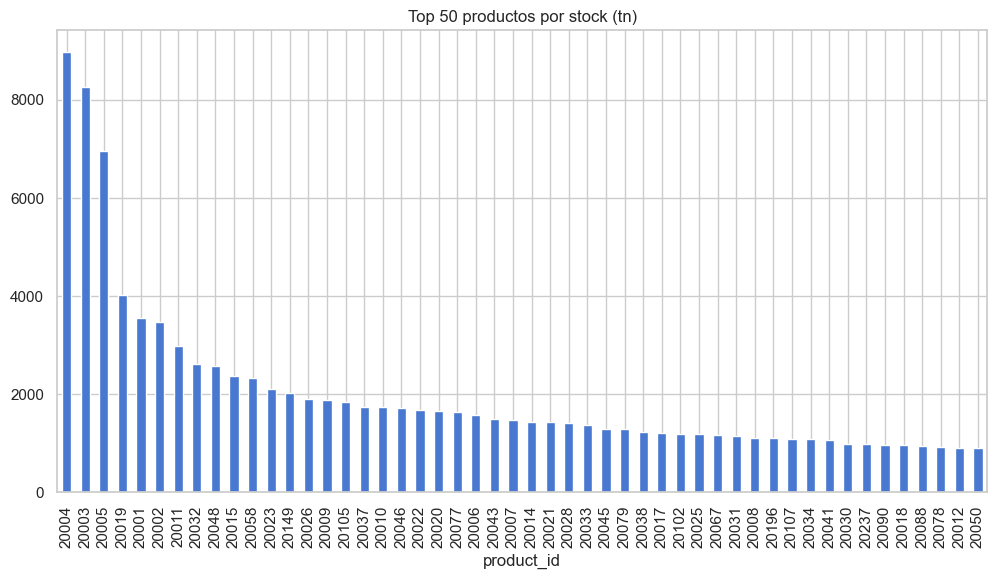

In [234]:
top = 50
stock_by_product = df_stocks.groupby('product_id')['stock_final'].sum().sort_values(ascending=False).head(top)
stock_by_product.plot(kind='bar', title=f'Top {top} productos por stock (tn)')

<Axes: title={'center': 'Top 50 productos por stock (tn)'}, xlabel='product_id'>

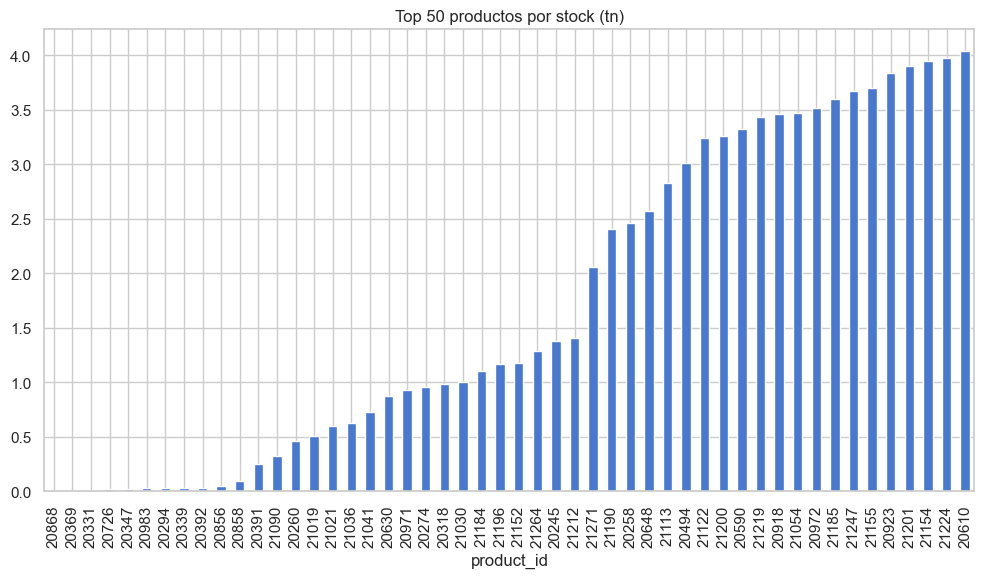

In [235]:
top = 50
stock_by_product = df_stocks.groupby('product_id')['stock_final'].sum().sort_values(ascending=True).head(top)
stock_by_product.plot(kind='bar', title=f'Top {top} productos por stock (tn)')

In [236]:
productos_catalogo = set(df_products['product_id'])
stock_productos = set(df_stocks['product_id'])

print("Productos en stock no catalogados:")
stock_productos - productos_catalogo

Productos en stock no catalogados:


{'20808', '20848', '20918', '21125', '21228', '21270'}

In [237]:
len(productos_catalogo - stock_productos)

162

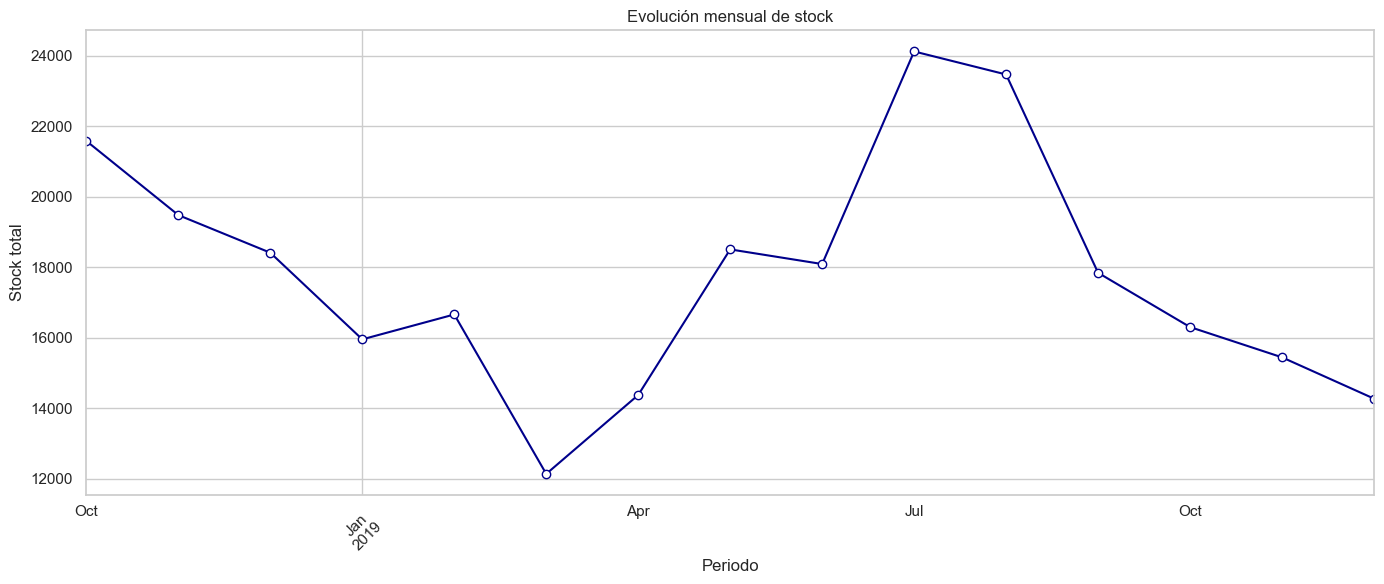

In [238]:
df_only_stock = df_stocks.dropna()
monthly_stock_sum = df_only_stock.groupby('periodo')['stock_final'].sum()
monthly_stock_sum.index = pd.to_datetime(monthly_stock_sum.index.astype(str), format='%Y%m')

monthly_stock_sum.plot(marker='o', linestyle='-', color='darkblue', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de stock')
plt.xlabel('Periodo')
plt.ylabel('Stock total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sell-in

In [239]:
df_sell_in

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.05300,0.05300
1,201701,10032,20524,0,1,0.13628,0.13628
2,201701,10217,20524,0,1,0.03028,0.03028
3,201701,10125,20524,0,1,0.02271,0.02271
4,201701,10012,20524,0,11,1.54452,1.54452
...,...,...,...,...,...,...,...
2945813,201912,10105,20853,0,1,0.02230,0.02230
2945814,201912,10092,20853,0,1,0.00669,0.00669
2945815,201912,10006,20853,0,7,0.02898,0.02898
2945816,201912,10018,20853,0,4,0.01561,0.01561


In [240]:
df_sell_in.dtypes

periodo                   object
customer_id               object
product_id                object
plan_precios_cuidados      int64
cust_request_qty           int64
cust_request_tn          float64
tn                       float64
dtype: object

In [241]:
df_sell_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945818 entries, 0 to 2945817
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                object 
 1   customer_id            object 
 2   product_id             object 
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 157.3+ MB


In [242]:
df_sell_in.nunique()

periodo                      36
customer_id                 597
product_id                 1233
plan_precios_cuidados         2
cust_request_qty             84
cust_request_tn          101954
tn                       101922
dtype: int64

In [243]:
df_sell_in.duplicated().sum()

0

In [244]:
df_sell_in.isnull().sum()

periodo                  0
customer_id              0
product_id               0
plan_precios_cuidados    0
cust_request_qty         0
cust_request_tn          0
tn                       0
dtype: int64

In [245]:
df_sell_in['periodo'].unique()

array(['201701', '201702', '201703', '201704', '201705', '201706',
       '201707', '201708', '201709', '201710', '201711', '201712',
       '201801', '201802', '201803', '201804', '201805', '201806',
       '201807', '201808', '201809', '201810', '201811', '201812',
       '201901', '201902', '201903', '201904', '201905', '201906',
       '201907', '201908', '201909', '201910', '201911', '201912'],
      dtype=object)

In [246]:
ventas_productos = set(df_sell_in['product_id'])
productos_catalogo = set(df_products['product_id'])
print("Productos en ventas no catalogados:")
ventas_productos - productos_catalogo

Productos en ventas no catalogados:


{'20808',
 '20848',
 '20918',
 '21066',
 '21098',
 '21125',
 '21165',
 '21169',
 '21178',
 '21199',
 '21217',
 '21223',
 '21225',
 '21228',
 '21230',
 '21238',
 '21240',
 '21241',
 '21249',
 '21253',
 '21268',
 '21270',
 '21272',
 '21273',
 '21274',
 '21275',
 '21277',
 '21278',
 '21279',
 '21281',
 '21283',
 '21284',
 '21285',
 '21286',
 '21288',
 '21289',
 '21290',
 '21291',
 '21292',
 '21293',
 '21295',
 '21296',
 '21297',
 '21298',
 '21299'}

In [247]:
len(ventas_productos - productos_catalogo)

45

Eliminar estos productos o que hacemos?

In [248]:
df_sell_in['plan_precios_cuidados'].value_counts(normalize=True) * 100

plan_precios_cuidados
0    98.844837
1     1.155163
Name: proportion, dtype: float64

<Axes: title={'center': 'Top 50 productos vendidos por cliente'}, xlabel='customer_id'>

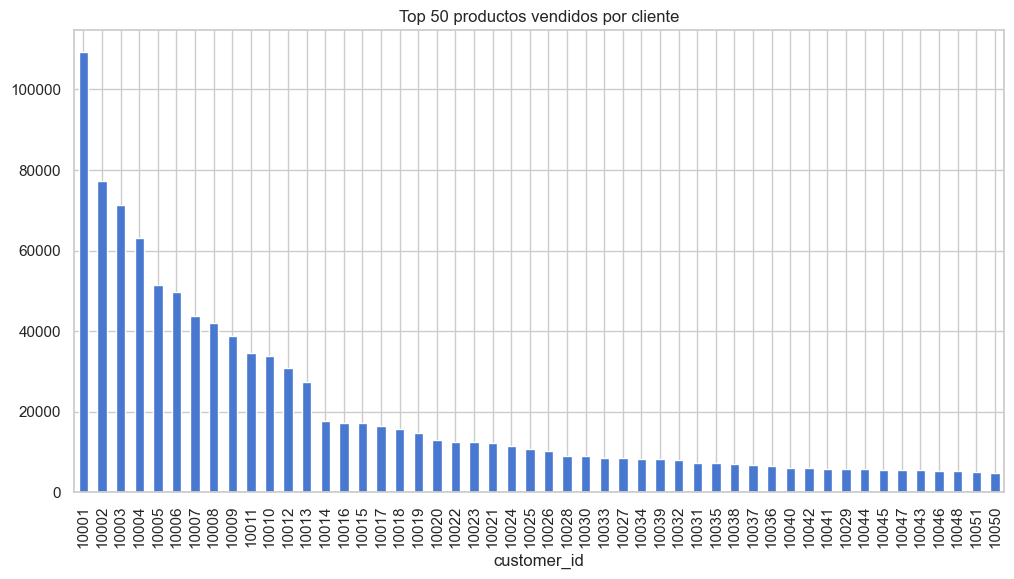

In [249]:
top = 50
stock_by_customer = df_sell_in.groupby('customer_id')['tn'].sum().sort_values(ascending=False).head(top)
stock_by_customer.plot(kind='bar', title=f'Top {top} productos vendidos por cliente')

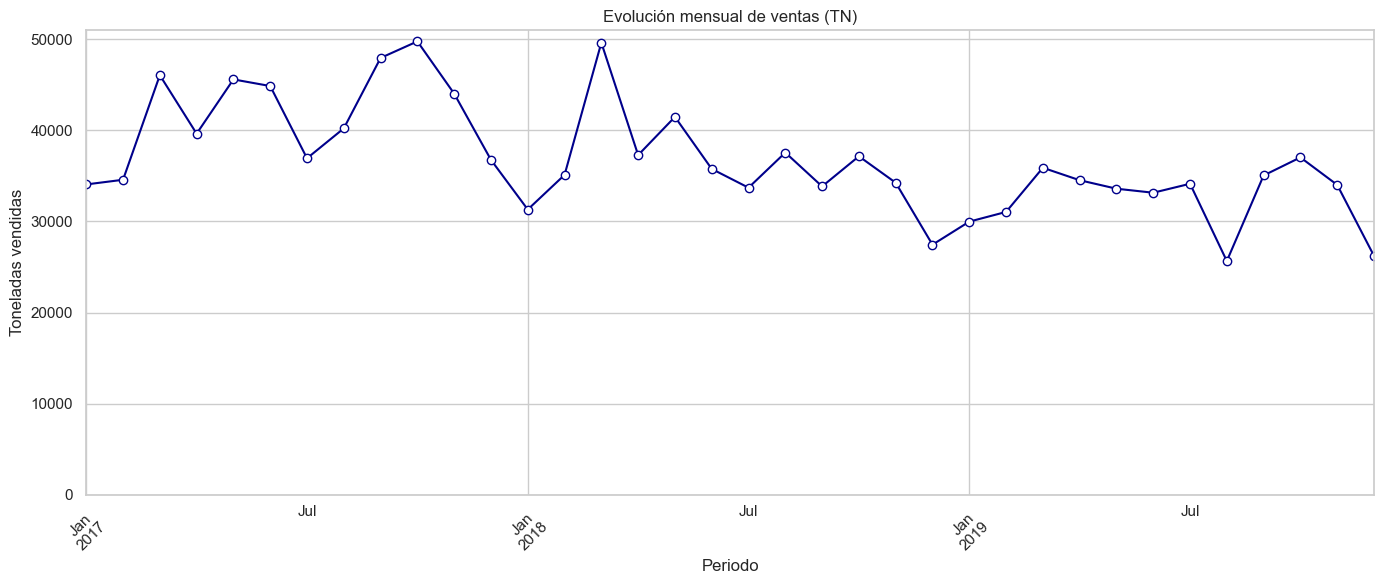

In [250]:
ventas_mes = df_sell_in.groupby('periodo')['tn'].sum()
ventas_mes.index = pd.to_datetime(ventas_mes.index.astype(str), format='%Y%m')
ventas_mes.name = 'Total'

ventas_mes.plot(marker='o', linestyle='-', color='darkblue', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas (TN)')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Análisis sobre dataset cruzado

#### Unificación del dataset

In [251]:
df = df_sell_in.merge(df_products, on='product_id', how='left').merge(df_stocks, on=['product_id', 'periodo'], how='left')
df

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,stock_final
0,201701,10234,20524,0,2,0.05300,0.05300,HC,VAJILLA,Cristalino,Importado,500,NaN
1,201701,10032,20524,0,1,0.13628,0.13628,HC,VAJILLA,Cristalino,Importado,500,NaN
2,201701,10217,20524,0,1,0.03028,0.03028,HC,VAJILLA,Cristalino,Importado,500,NaN
3,201701,10125,20524,0,1,0.02271,0.02271,HC,VAJILLA,Cristalino,Importado,500,NaN
4,201701,10012,20524,0,11,1.54452,1.54452,HC,VAJILLA,Cristalino,Importado,500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988645,201912,10105,20853,0,1,0.02230,0.02230,PC,CABELLO,Shampoo Bebe,NIVEA,200,1.82373
2988646,201912,10092,20853,0,1,0.00669,0.00669,PC,CABELLO,Shampoo Bebe,NIVEA,200,1.82373
2988647,201912,10006,20853,0,7,0.02898,0.02898,PC,CABELLO,Shampoo Bebe,NIVEA,200,1.82373
2988648,201912,10018,20853,0,4,0.01561,0.01561,PC,CABELLO,Shampoo Bebe,NIVEA,200,1.82373


In [252]:
df.dtypes

periodo                   object
customer_id               object
product_id                object
plan_precios_cuidados      int64
cust_request_qty           int64
cust_request_tn          float64
tn                       float64
cat1                      object
cat2                      object
cat3                      object
brand                     object
sku_size                  object
stock_final              float64
dtype: object

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988650 entries, 0 to 2988649
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                object 
 1   customer_id            object 
 2   product_id             object 
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
 7   cat1                   object 
 8   cat2                   object 
 9   cat3                   object 
 10  brand                  object 
 11  sku_size               object 
 12  stock_final            float64
dtypes: float64(3), int64(2), object(8)
memory usage: 296.4+ MB


In [254]:
df.nunique()

periodo                      36
customer_id                 597
product_id                 1233
plan_precios_cuidados         2
cust_request_qty             84
cust_request_tn          101954
tn                       101922
cat1                          4
cat2                         15
cat3                         93
brand                        37
sku_size                     75
stock_final               12596
dtype: int64

#### Toneladas por categorias/marcas

<Axes: xlabel='cat1'>

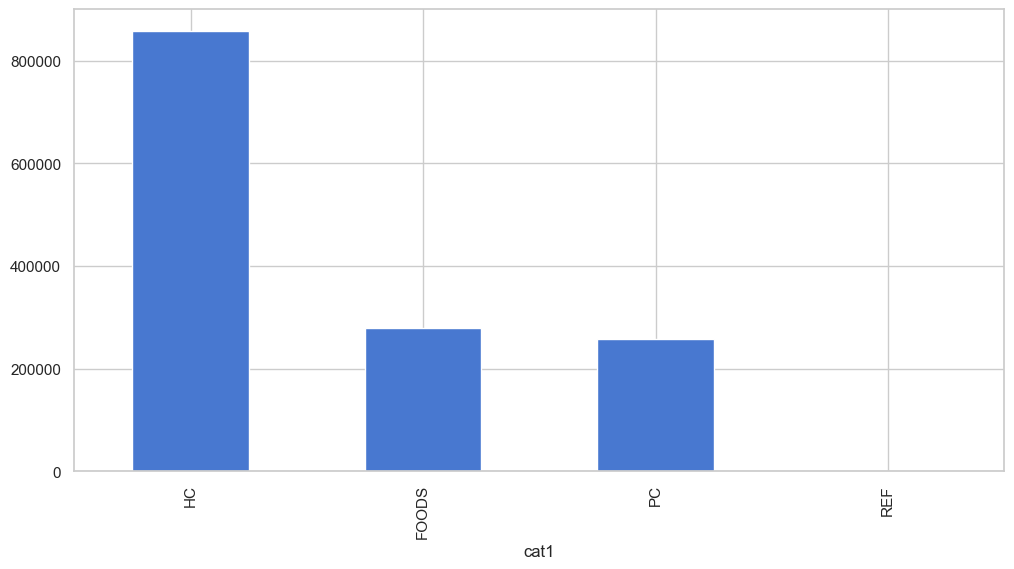

In [255]:
df.groupby('cat1')['tn'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='cat2'>

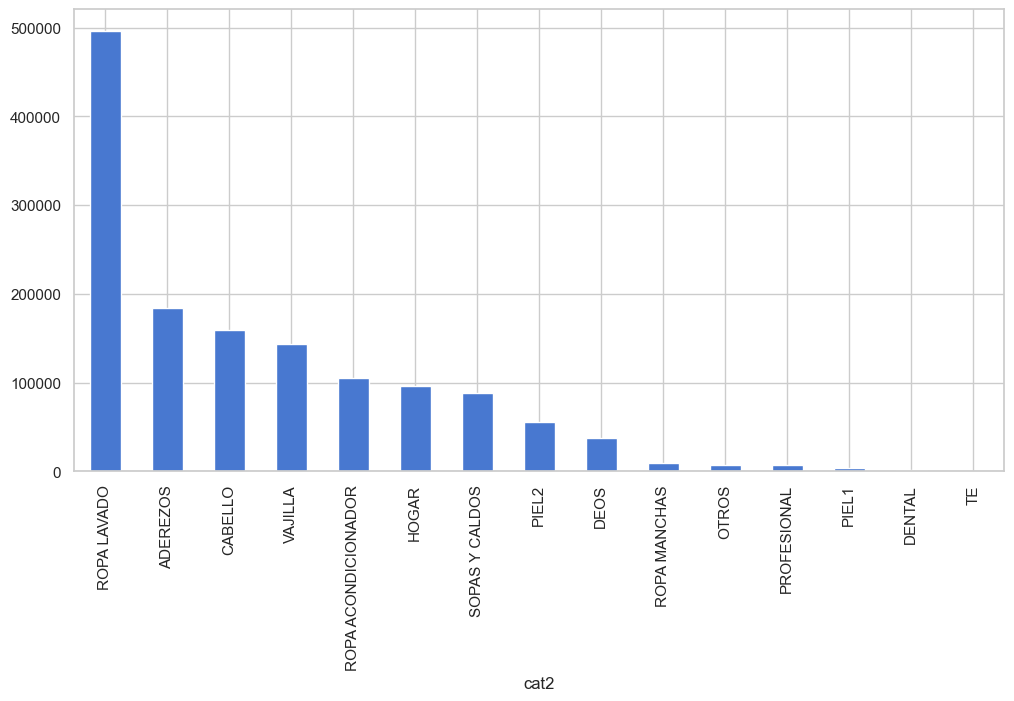

In [256]:
df.groupby('cat2')['tn'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='cat3'>

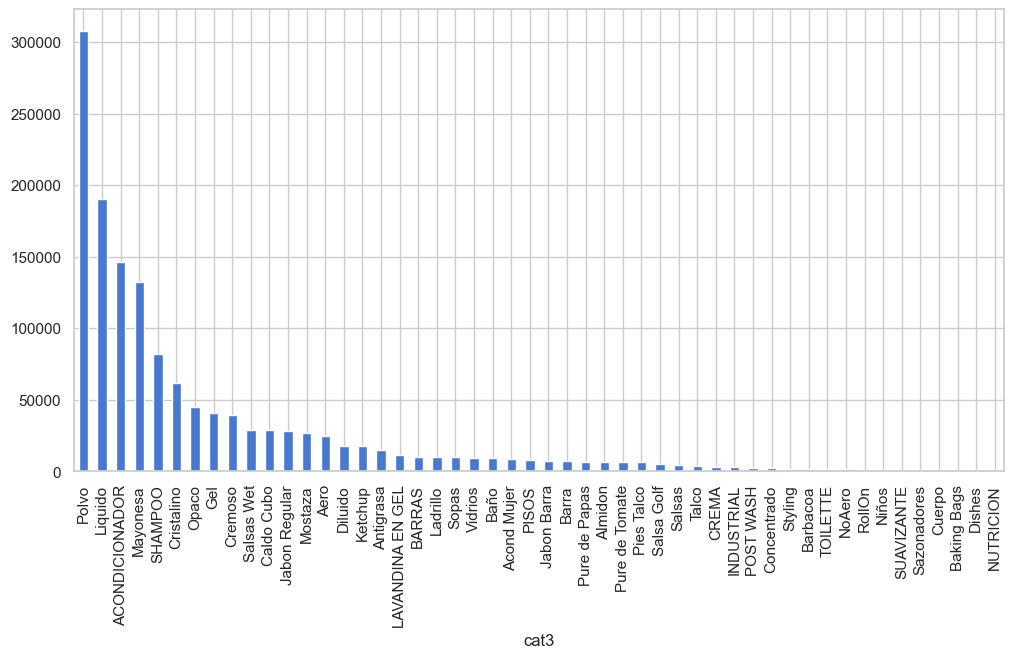

In [257]:
df.groupby('cat3')['tn'].sum().sort_values(ascending=False).head(50).plot(kind='bar')

<Axes: xlabel='brand'>

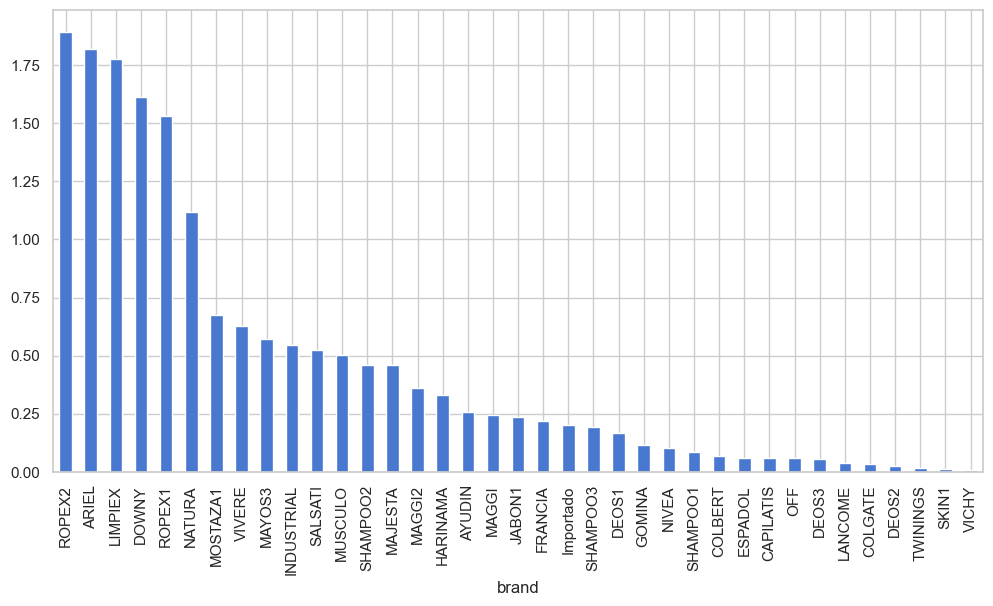

In [258]:
df.groupby('brand')['tn'].mean().sort_values(ascending=False).plot(kind='bar')

#### Meses con datos para cada producto

In [259]:
min_max_period = df.groupby(['product_id'])['periodo'].agg(['min', 'max'])
min_max_period['min'] = pd.to_datetime(min_max_period['min'].astype(str), format='%Y%m')
min_max_period['max'] = pd.to_datetime(min_max_period['max'].astype(str), format='%Y%m')

min_max_period['meses_con_datos'] = (min_max_period['max'].dt.year - min_max_period['min'].dt.year) * 12 + \
                                     (min_max_period['max'].dt.month - min_max_period['min'].dt.month)

min_max_period.sort_values(by='meses_con_datos', ascending=False, inplace=True)
min_max_period

,min,max,meses_con_datos
product_id,,,
20001,2017-01-01,2019-12-01,35
20432,2017-01-01,2019-12-01,35
20434,2017-01-01,2019-12-01,35
20435,2017-01-01,2019-12-01,35
20438,2017-01-01,2019-12-01,35
...,...,...,...
21169,2019-10-01,2019-10-01,0
20792,2019-12-01,2019-12-01,0
20854,2019-12-01,2019-12-01,0


Corregir cuenta para arrancar en 1 los meses

#### Evolución mensual de ventas por categorias

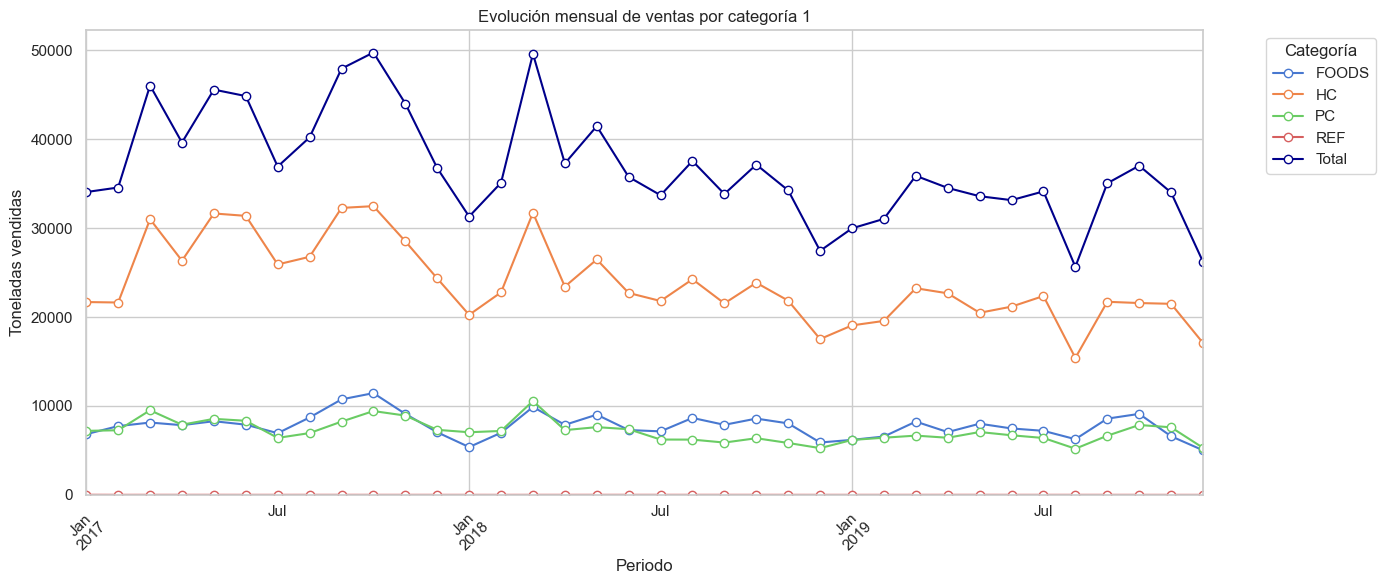

In [260]:
ventas_cat = df.groupby(['periodo', 'cat1'])['tn'].sum().unstack()
ventas_cat.index = pd.to_datetime(ventas_cat.index.astype(str), format='%Y%m')

ventas_cat.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
ventas_mes.plot(marker='o', linestyle='-', color='darkblue', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por categoría 1')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

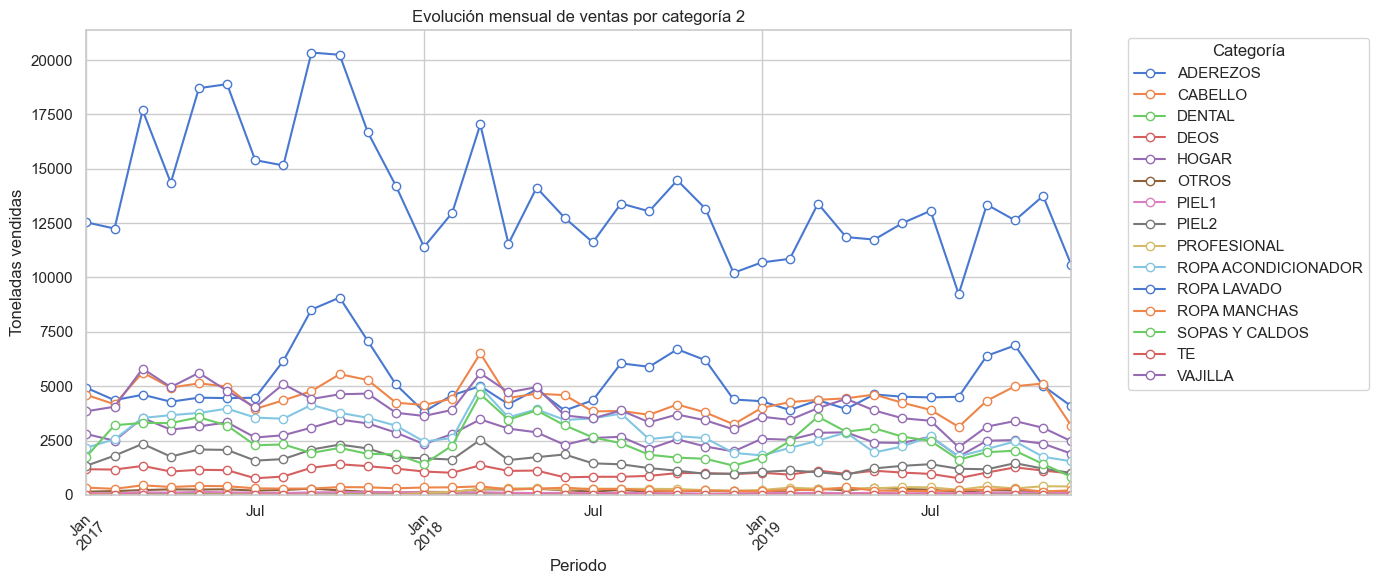

In [261]:
ventas_cat = df.groupby(['periodo', 'cat2'])['tn'].sum().unstack()
ventas_cat.index = pd.to_datetime(ventas_cat.index.astype(str), format='%Y%m')

ventas_cat.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por categoría 2')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

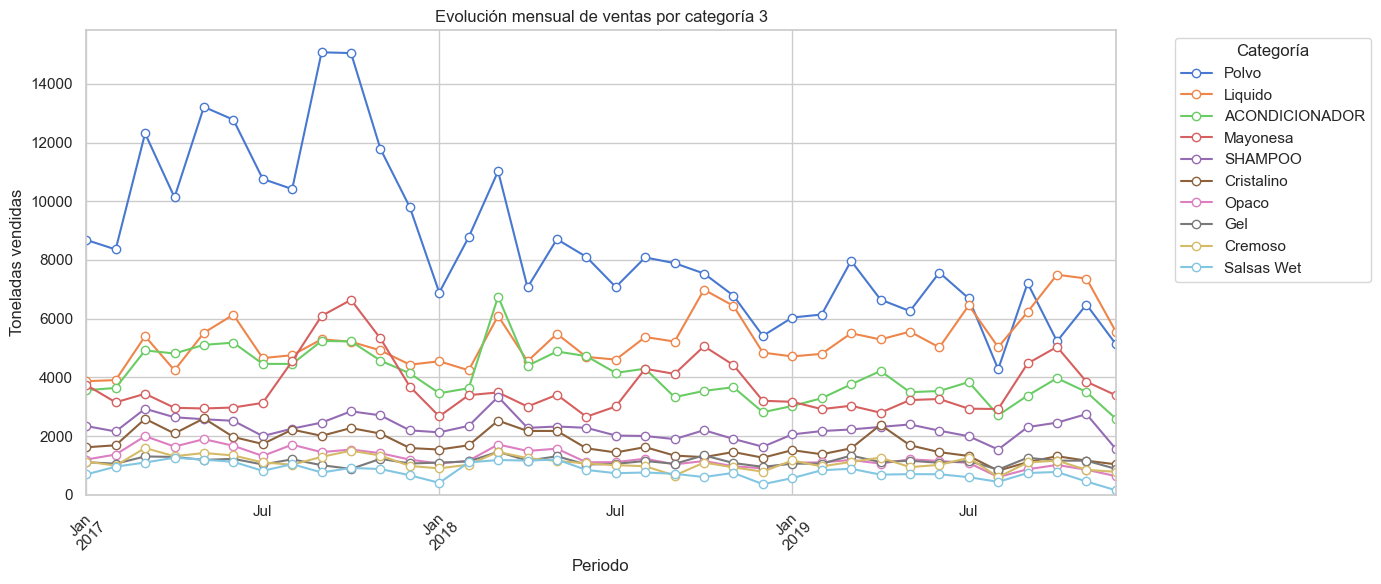

In [262]:
top = 10
ventas_cat = df.groupby(['periodo', 'cat3'])['tn'].sum().unstack()
ventas_cat_top = ventas_cat[df.groupby('cat3')['tn'].sum().sort_values(ascending=False).head(top).index]
ventas_cat_top.index = pd.to_datetime(ventas_cat_top.index.astype(str), format='%Y%m')

ventas_cat_top.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por categoría 3')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

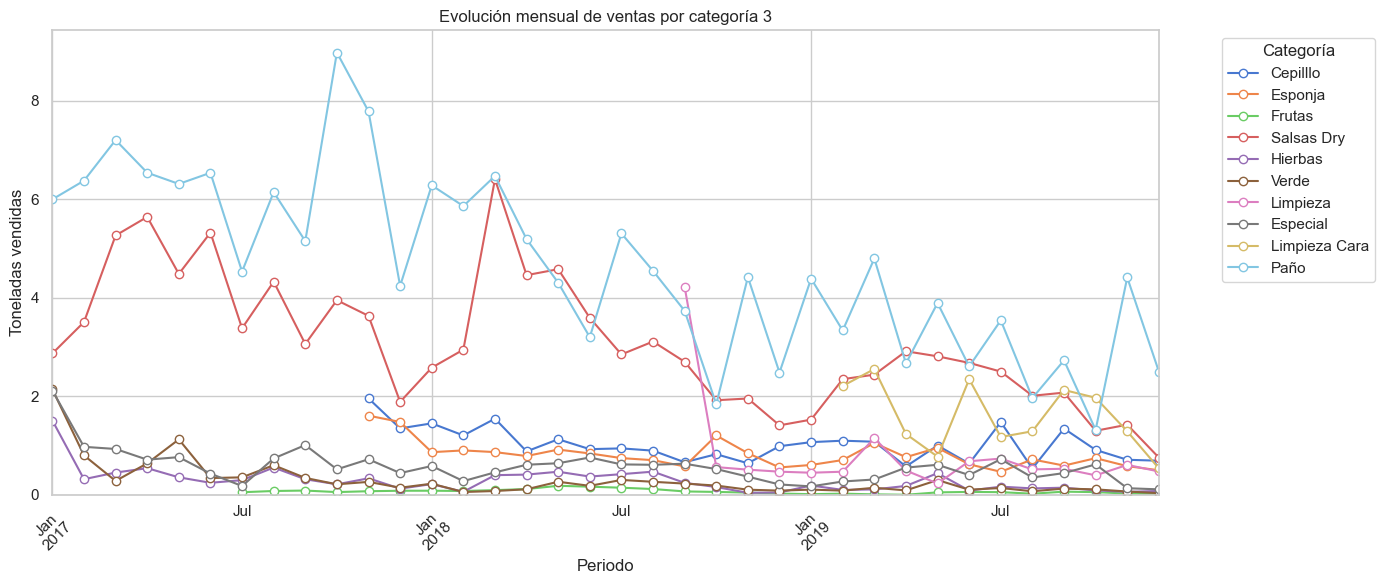

In [263]:
top = 10
ventas_cat = df.groupby(['periodo', 'cat3'])['tn'].sum().unstack()
ventas_cat_top = ventas_cat[df.groupby('cat3')['tn'].mean().sort_values(ascending=True).head(top).index]
ventas_cat_top.index = pd.to_datetime(ventas_cat_top.index.astype(str), format='%Y%m')

ventas_cat_top.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por categoría 3')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Evolución mensual de ventas por cliente

#### ¿Cuáles son los clientes con mayor volumen?

In [264]:
customer_volume = df.groupby('customer_id')['tn'].sum()
top_n = 10
top_customers = customer_volume.sort_values(ascending=False).head(top_n)
top_customers

customer_id
10001    111151.02411
10002     82562.94825
10003     72940.66938
10004     63905.73977
10005     56153.19721
10006     53880.11857
10007     44425.80159
10008     44259.55696
10009     42503.13589
10011     36260.13967
Name: tn, dtype: float64

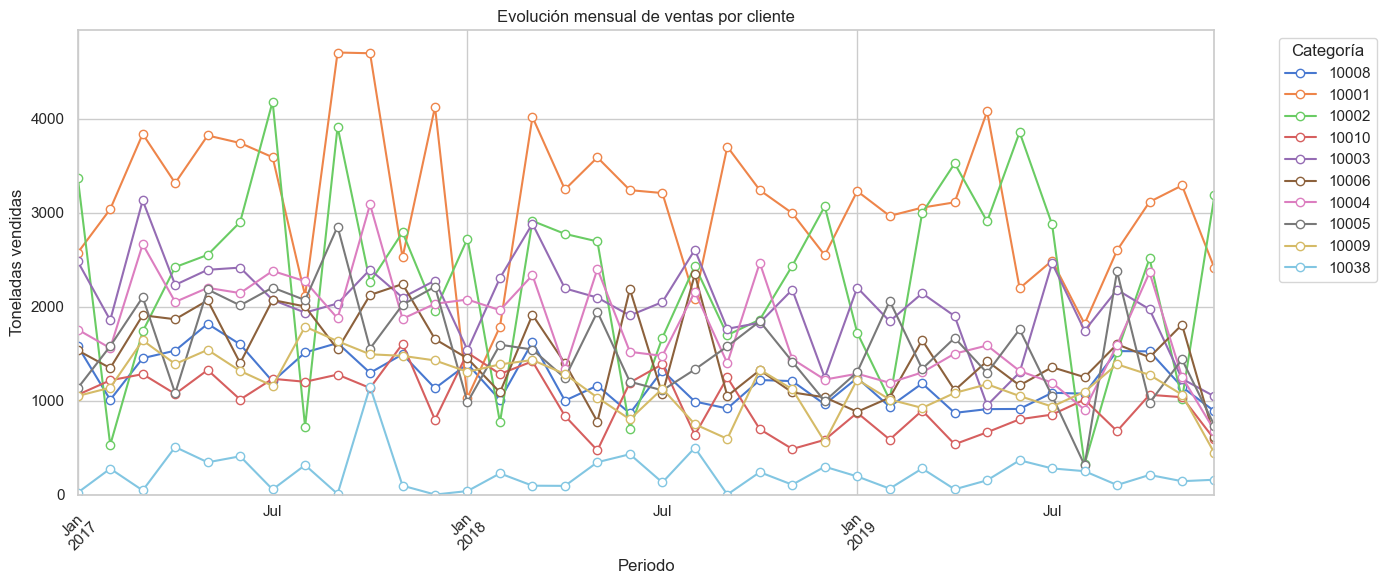

In [265]:
top = 10

ventas_customer = df.groupby(['periodo', 'customer_id'])['tn'].sum().unstack()
ventas_customer_top = ventas_customer[df.groupby('customer_id')['tn'].mean().sort_values(ascending=False).head(top).index]
ventas_customer_top.index = pd.to_datetime(ventas_customer_top.index.astype(str), format='%Y%m')

ventas_customer_top.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por cliente')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

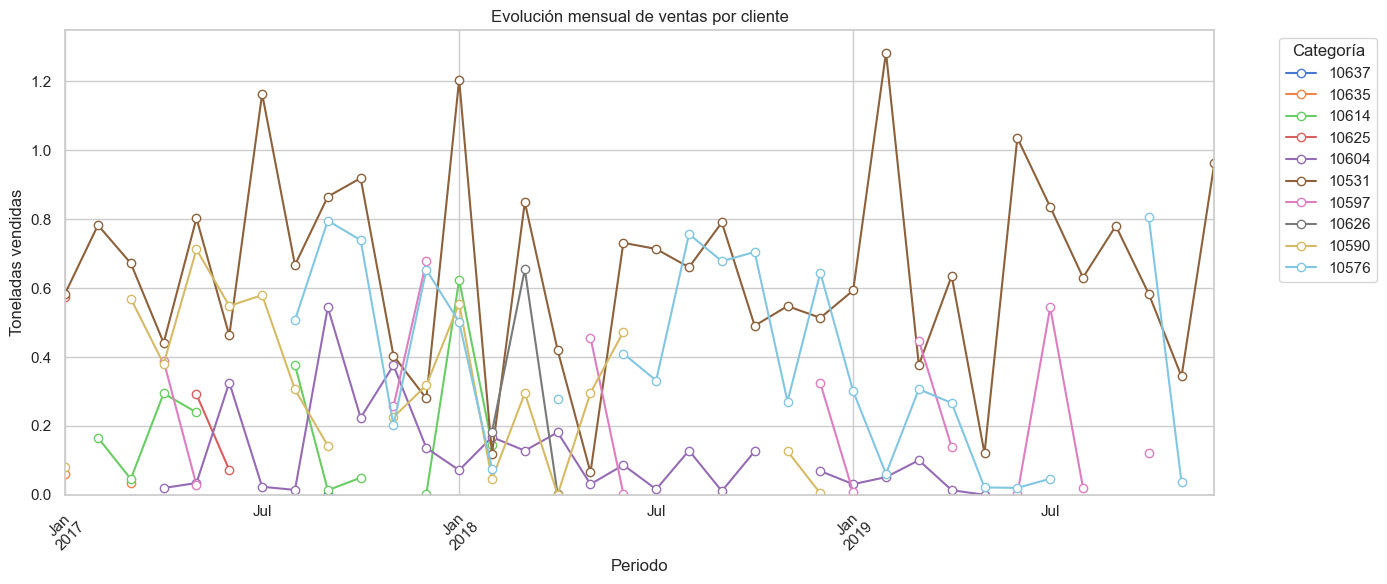

In [266]:
top = 10

ventas_customer = df.groupby(['periodo', 'customer_id'])['tn'].sum().unstack()
ventas_customer_top = ventas_customer[df.groupby('customer_id')['tn'].mean().sort_values(ascending=True).head(top).index]
ventas_customer_top.index = pd.to_datetime(ventas_customer_top.index.astype(str), format='%Y%m')

ventas_customer_top.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por cliente')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Evolución mensual de ventas para el top 10 de marcas

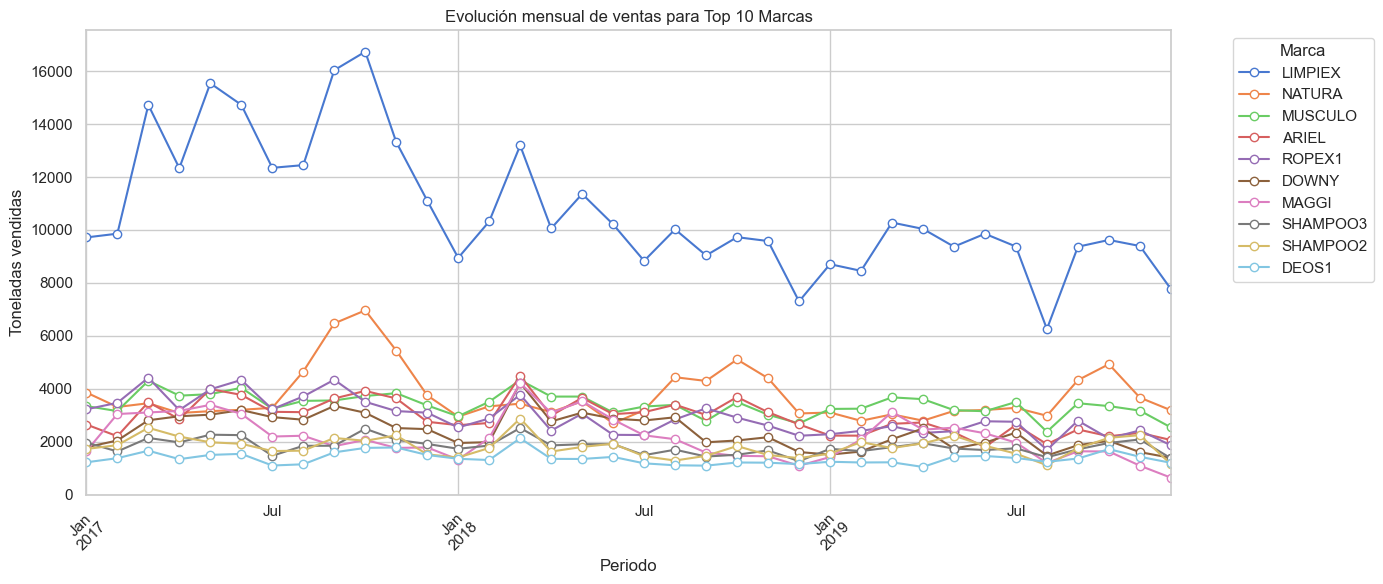

In [267]:
top_brands = df.groupby('brand')['tn'].sum().sort_values(ascending=False).head(10).index.tolist()

ventas_brand = df.groupby(['periodo', 'brand'])['tn'].sum().unstack()
ventas_brand_top = ventas_brand[top_brands]
ventas_brand_top.index = pd.to_datetime(ventas_brand_top.index.astype(str), format='%Y%m')

ventas_brand_top.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas para Top 10 Marcas')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Comparación con ventas por plan precios cuidados

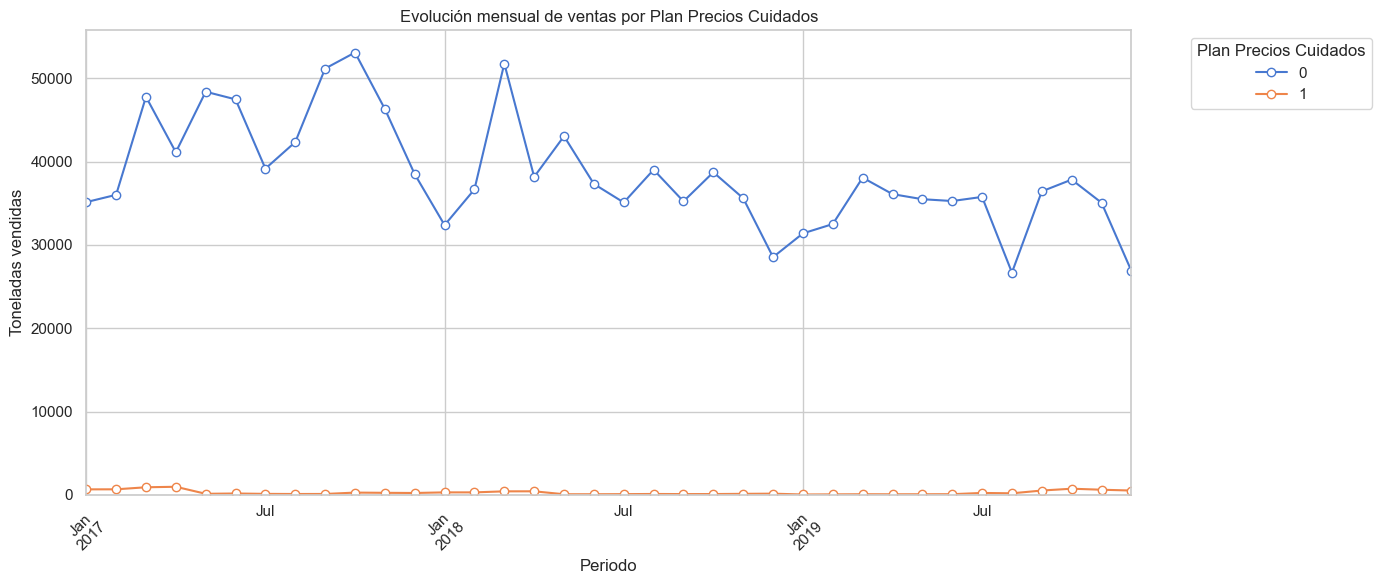

In [268]:
ventas_precios_cuidados = df.groupby(['periodo', 'plan_precios_cuidados'])['tn'].sum().unstack()
ventas_precios_cuidados.index = pd.to_datetime(ventas_precios_cuidados.index.astype(str), format='%Y%m')

ventas_precios_cuidados.plot(marker='o', linestyle='-', markersize=6, markerfacecolor='white', figsize=(14, 6))
plt.title('Evolución mensual de ventas por Plan Precios Cuidados')
plt.xlabel('Periodo')
plt.ylabel('Toneladas vendidas')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.legend(title='Plan Precios Cuidados', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### SKU


In [269]:
sku_per_customer = df_sell_in.groupby('customer_id')['product_id'].nunique().sort_values(ascending=False)

print("Distribución de la cantidad de SKUs distintos por cliente:")
sku_per_customer.describe()

Distribución de la cantidad de SKUs distintos por cliente:


count     597.000000
mean      627.201005
std       316.313157
min         2.000000
25%       405.000000
50%       689.000000
75%       888.000000
max      1130.000000
Name: product_id, dtype: float64

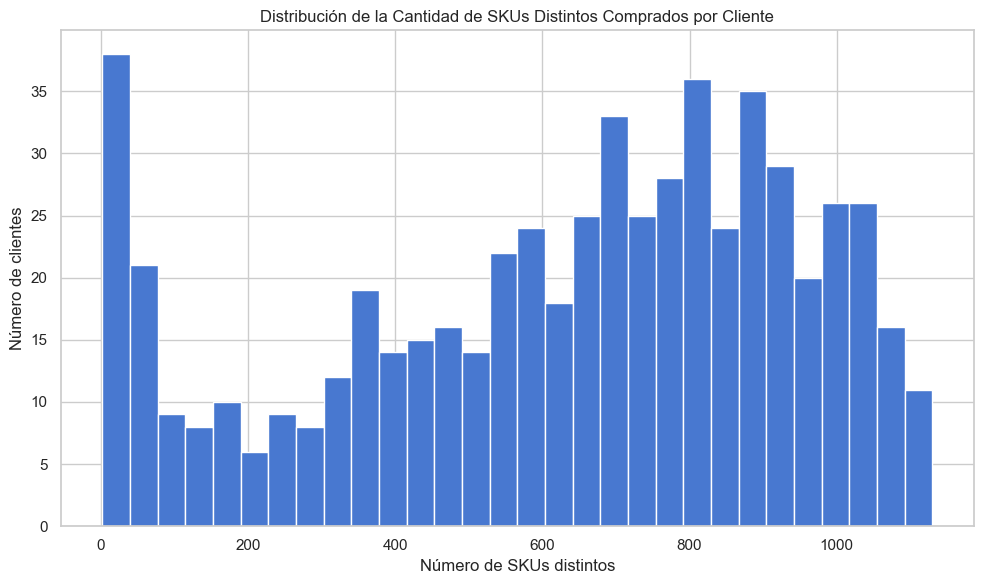

In [270]:
plt.figure(figsize=(10, 6))
sku_per_customer.hist(bins=30)
plt.title('Distribución de la Cantidad de SKUs Distintos Comprados por Cliente')
plt.xlabel('Número de SKUs distintos')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()

* Analizar SKU/Cliente como se comporta en el tiempo el sell-in
* Analizar para los primeros 15 clientes el top 3 de productos de c/categoria

In [271]:
average_sku_per_customer = sku_per_customer.mean()
print(f"\nEl promedio de SKUs distintos comprados por cliente es: {average_sku_per_customer:.2f}")


El promedio de SKUs distintos comprados por cliente es: 627.20


In [272]:
top_n = 20
print(f"\nClientes que compran la mayor cantidad de SKUs distintos (Top {top_n}):")
sku_per_customer.head(top_n)


Clientes que compran la mayor cantidad de SKUs distintos (Top 20):


customer_id
10027    1130
10032    1123
10059    1117
10124    1106
10158    1104
10034    1104
10095    1102
10106    1101
10135    1096
10001    1094
10056    1094
10218    1091
10062    1090
10206    1090
10060    1086
10140    1080
10367    1079
10183    1077
10182    1075
10068    1074
Name: product_id, dtype: int64

In [273]:
print(f"\nClientes que compran la menor cantidad de SKUs distintos (Top {top_n}):")
sku_per_customer.tail(top_n)


Clientes que compran la menor cantidad de SKUs distintos (Top 20):


customer_id
10593    14
10419    14
10618    14
10386    12
10545    11
10557    11
10512    10
10572     8
10629     8
10599     7
10558     7
10373     6
10507     6
10591     5
10577     5
10559     5
10636     5
10632     2
10633     2
10637     2
Name: product_id, dtype: int64

In [274]:
ventas_var = df.groupby('product_id')['tn'].agg(['mean', 'std'])
ventas_var['cv'] = ventas_var['std'] / ventas_var['mean']
ventas_var

,mean,std,cv
product_id,,,
20001,8.156253,31.776834,3.896009
20002,6.056209,24.335848,4.018330
20003,4.711343,15.572606,3.305343
20004,3.386770,8.802531,2.599093
20005,3.923400,12.291786,3.132942
...,...,...,...
21295,0.006990,NaN,NaN
21296,0.006510,NaN,NaN
21297,0.005790,NaN,NaN


#### Estacionalidad por categoría/marca/cliente

Ventas por mes (independiente del año) para ver si hay ciclos típicos.

In [275]:
def plot_ventas_mensuales_por_dim(df, columna, top_n=5):
    df = df.copy()
    df['month'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m').dt.month

    pivot = df.groupby(['month', columna])['tn'].sum().reset_index()

    top_dim = pivot.groupby(columna)['tn'].sum().sort_values(ascending=False).head(top_n).index
    pivot = pivot[pivot[columna].isin(top_dim)]

    pivot = pivot.pivot(index='month', columns=columna, values='tn')

    meses_orden = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    pivot.index = pd.to_datetime(pivot.index, format='%m').month_name()
    pivot = pivot.reindex(meses_orden)

    pivot.plot(kind='bar', figsize=(14, 6))
    plt.title(f'Ventas mensuales por {columna} (todos los años combinados)')
    plt.xlabel('Mes')
    plt.ylabel('Toneladas vendidas')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=columna, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [276]:
df_ventas = df_sell_in.merge(df_products[['product_id', 'cat1', 'cat2', 'cat3', 'brand']], on='product_id', how='left')

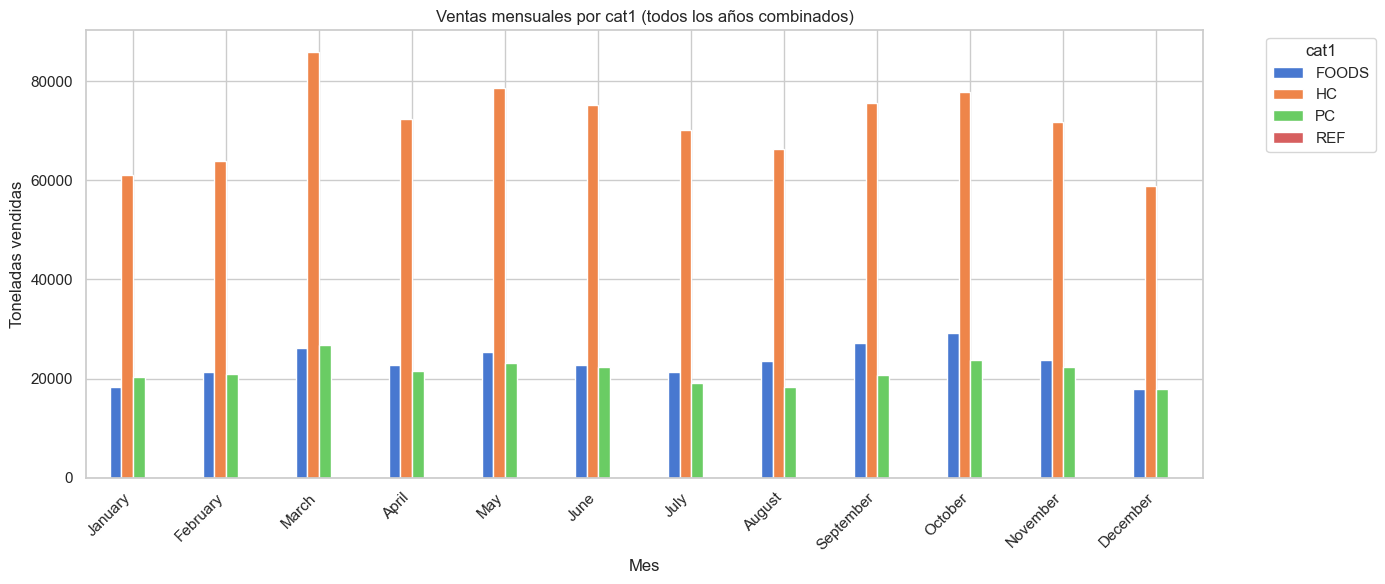

In [277]:
plot_ventas_mensuales_por_dim(df_ventas, 'cat1')

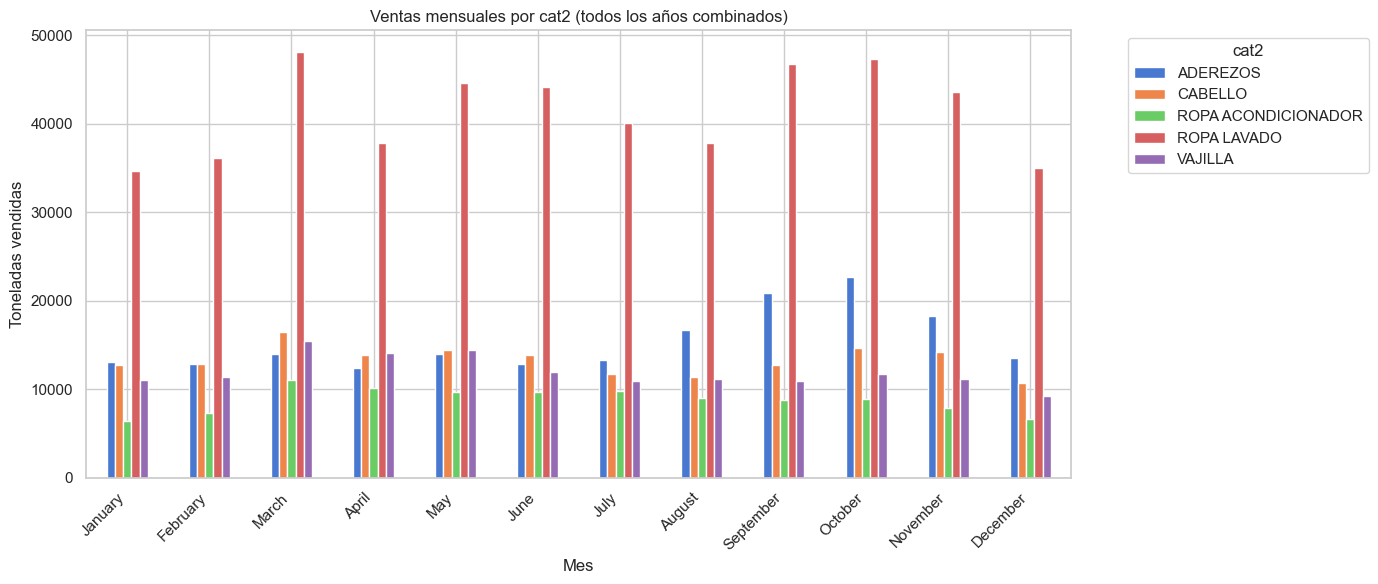

In [278]:
plot_ventas_mensuales_por_dim(df_ventas, 'cat2')

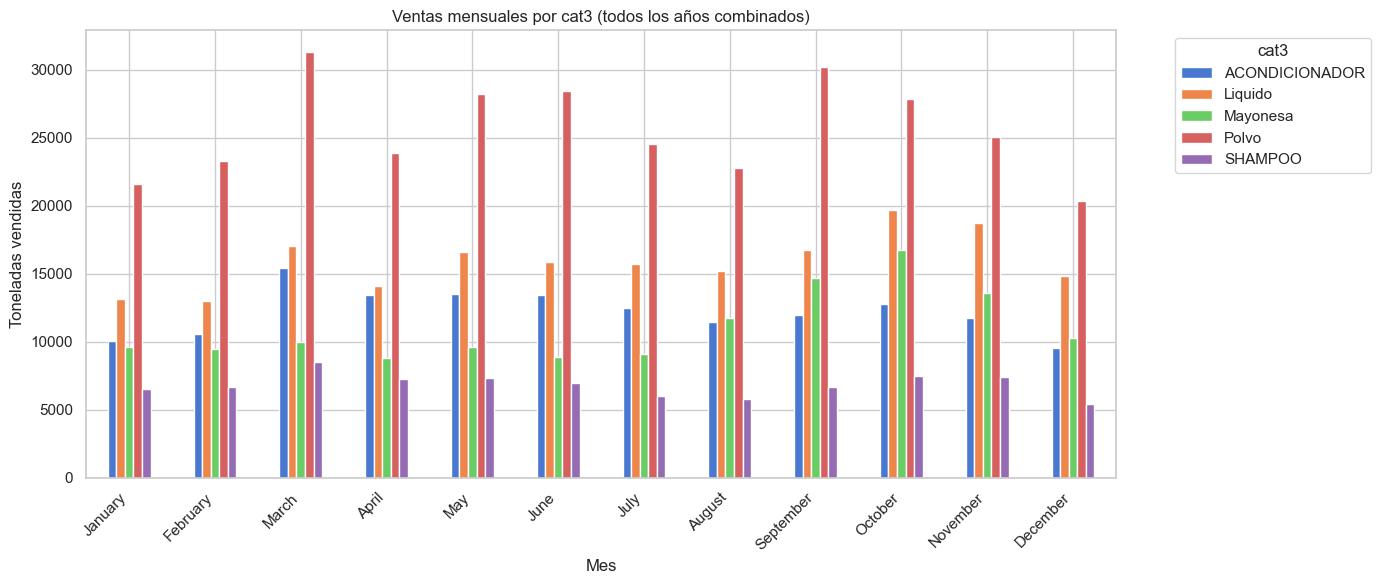

In [279]:
plot_ventas_mensuales_por_dim(df_ventas, 'cat3')

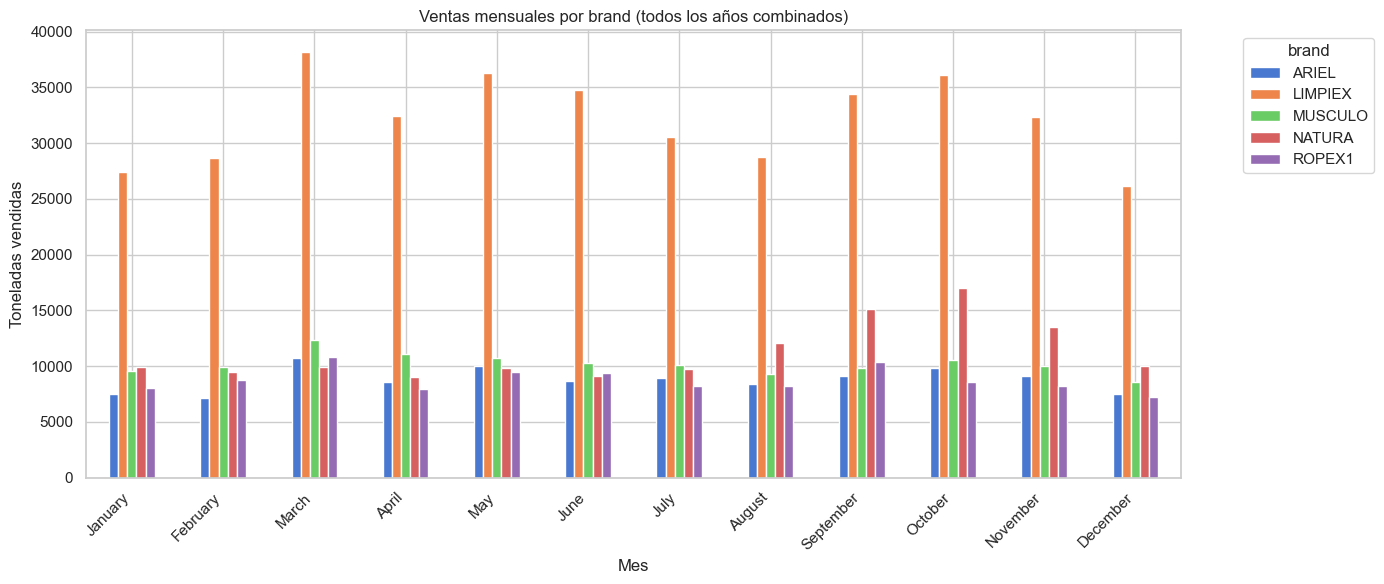

In [280]:
plot_ventas_mensuales_por_dim(df_ventas, 'brand')

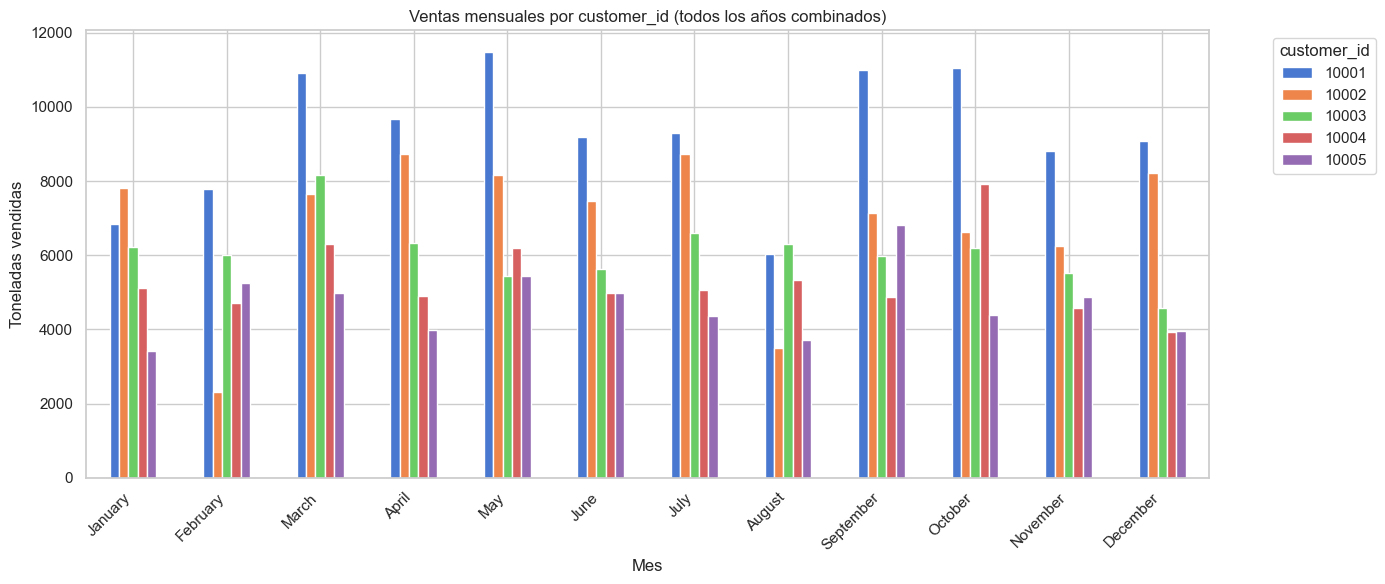

In [281]:
plot_ventas_mensuales_por_dim(df_ventas, 'customer_id')

#### Estacionalidad por categoria/marca/cliente (en %)

In [282]:
def plot_ventas_mensuales_por_dim_normalizado(df, columna, top_n=5):
    df = df.copy()
    df['month'] = pd.to_datetime(df['periodo'].astype(str), format='%Y%m').dt.month

    pivot = df.groupby(['month', columna])['tn'].sum().reset_index()

    top_dim = pivot.groupby(columna)['tn'].sum().sort_values(ascending=False).head(top_n).index
    pivot = pivot[pivot[columna].isin(top_dim)]

    pivot = pivot.pivot(index='month', columns=columna, values='tn').fillna(0)

    pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

    meses_orden = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    pivot_percent.index = pd.to_datetime(pivot_percent.index, format='%m').month_name()
    pivot_percent = pivot_percent.reindex(meses_orden)

    pivot_percent.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
    plt.title(f'Composición mensual de ventas por {columna} (Top {top_n}, %)')
    plt.xlabel('Mes')
    plt.ylabel('% del total mensual')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=columna, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [283]:
df_ventas = df_sell_in.merge(df_products[['product_id', 'cat1', 'cat2', 'cat3', 'brand']], on='product_id', how='left')

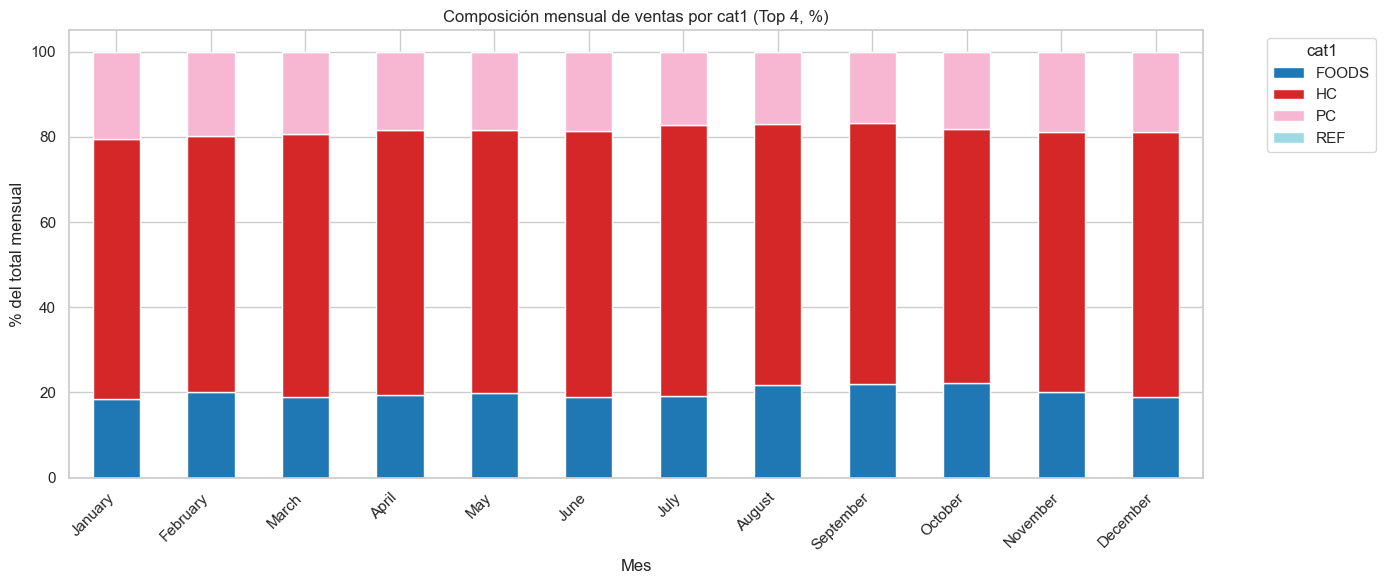

In [284]:
plot_ventas_mensuales_por_dim_normalizado(df_ventas, 'cat1', top_n=4)

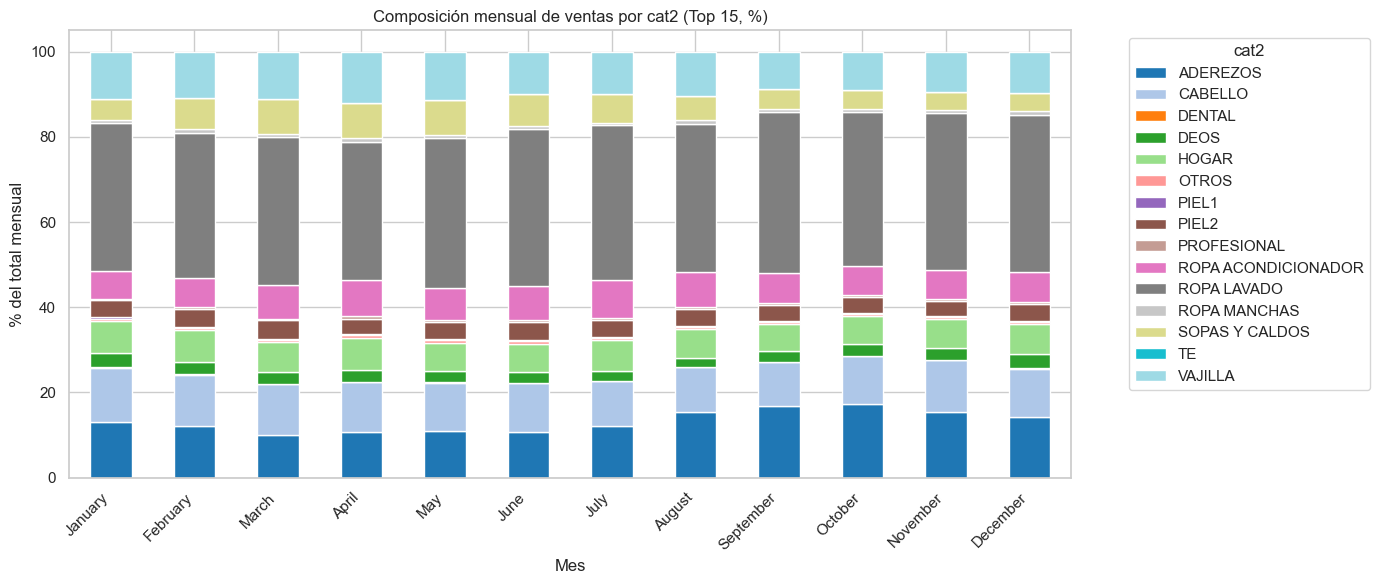

In [285]:
plot_ventas_mensuales_por_dim_normalizado(df_ventas, 'cat2', top_n=15)

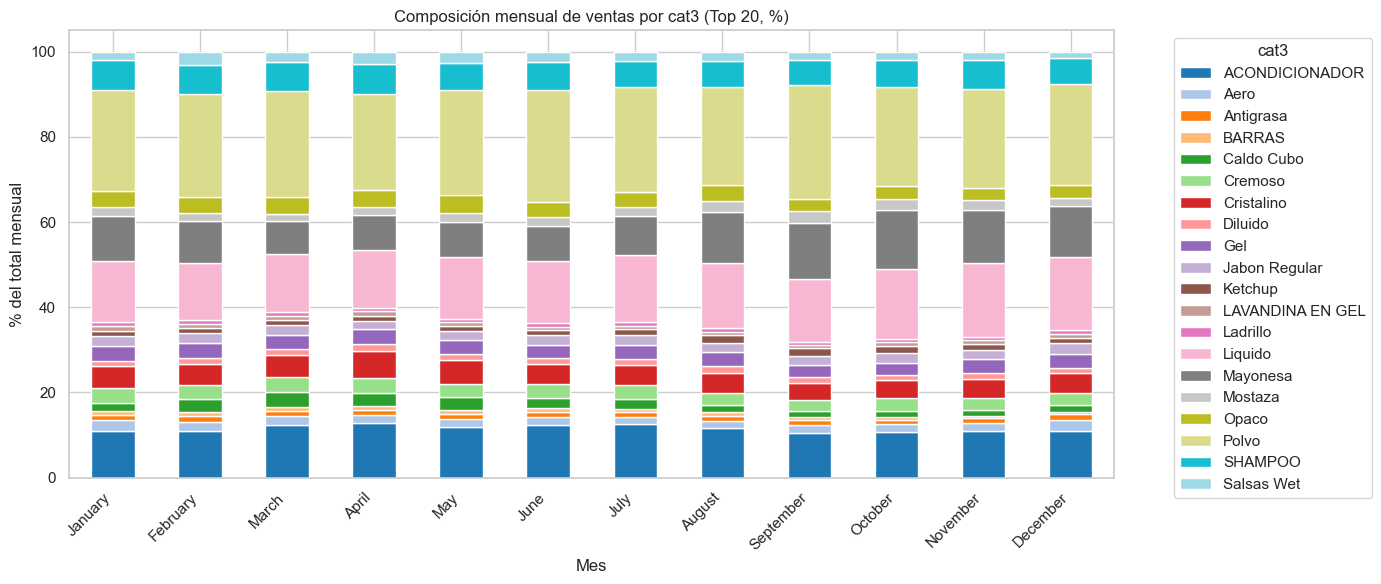

In [286]:
plot_ventas_mensuales_por_dim_normalizado(df_ventas, 'cat3', top_n=20)

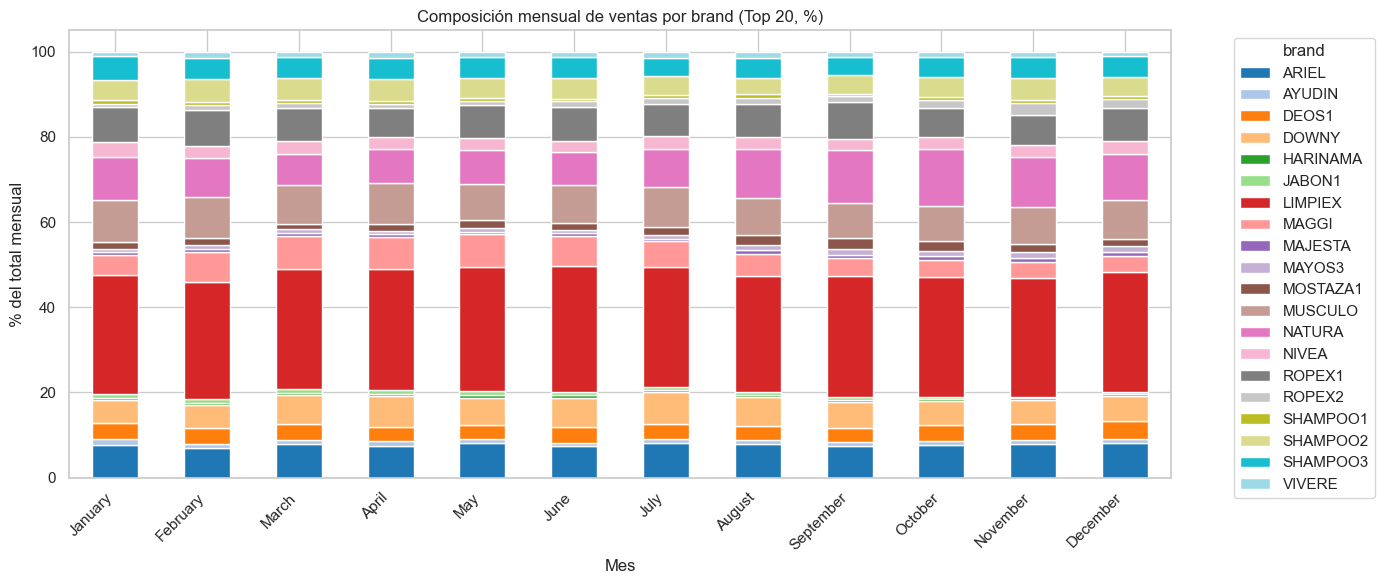

In [287]:
plot_ventas_mensuales_por_dim_normalizado(df_ventas, 'brand', top_n=20)

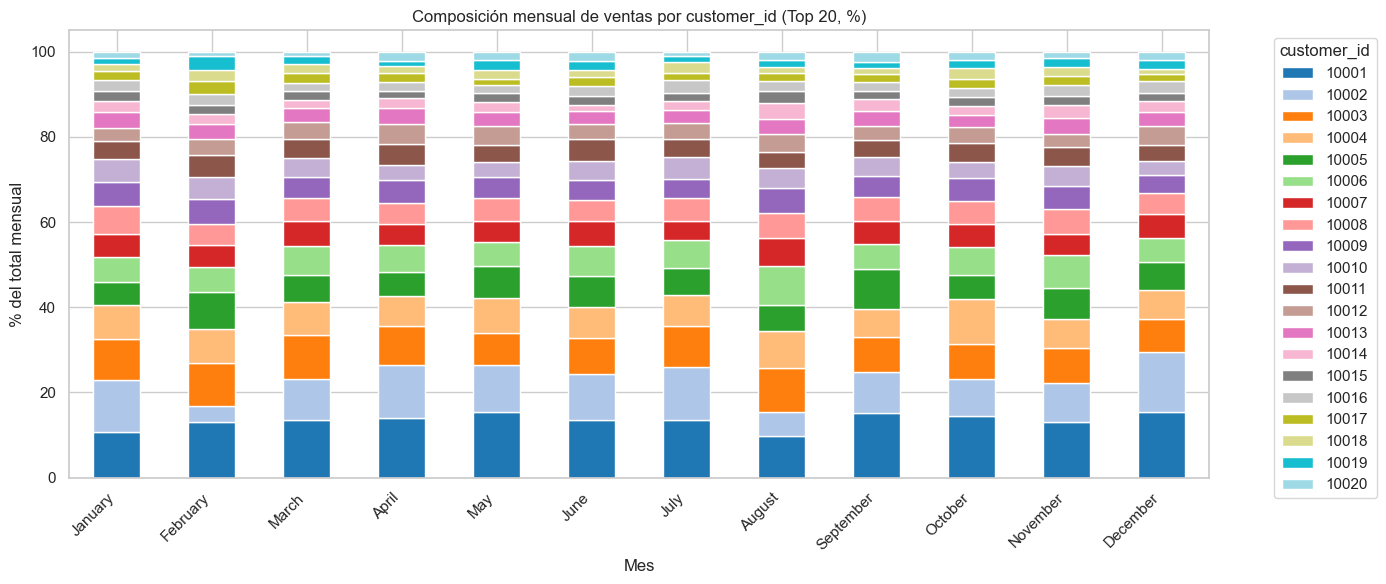

In [288]:
plot_ventas_mensuales_por_dim_normalizado(df_ventas, 'customer_id', top_n=20)

#### Ventas mensuales en toneladas para un cliente/producto

In [289]:
def plot_ventas_cliente_producto(df, customer_id, product_id):
    df_copy = df[(df['customer_id'] == customer_id) & (df['product_id'] == product_id)].copy()
    df_copy['periodo_dt'] = pd.to_datetime(df_copy['periodo'].astype(str), format='%Y%m')
    ventas_mensuales = df_copy.groupby('periodo_dt')['tn'].sum()
    if ventas_mensuales.empty:
        print(f"No hay datos para cliente {customer_id} y producto {product_id}")
        return
    rango_meses = pd.date_range(start=ventas_mensuales.index.min(), end=ventas_mensuales.index.max(), freq='MS')
    ventas_mensuales = ventas_mensuales.reindex(rango_meses, fill_value=0)
    ventas_mensuales.index = ventas_mensuales.index.strftime('%Y/%m')
    ventas_mensuales.plot(kind='bar', figsize=(12, 5),
                          title=f'Ventas mensuales en toneladas - Cliente {customer_id} | Producto {product_id}',
                          color='steelblue')
    plt.xlabel('Mes')
    plt.ylabel('Toneladas vendidas')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [290]:
customer_id = '10001'

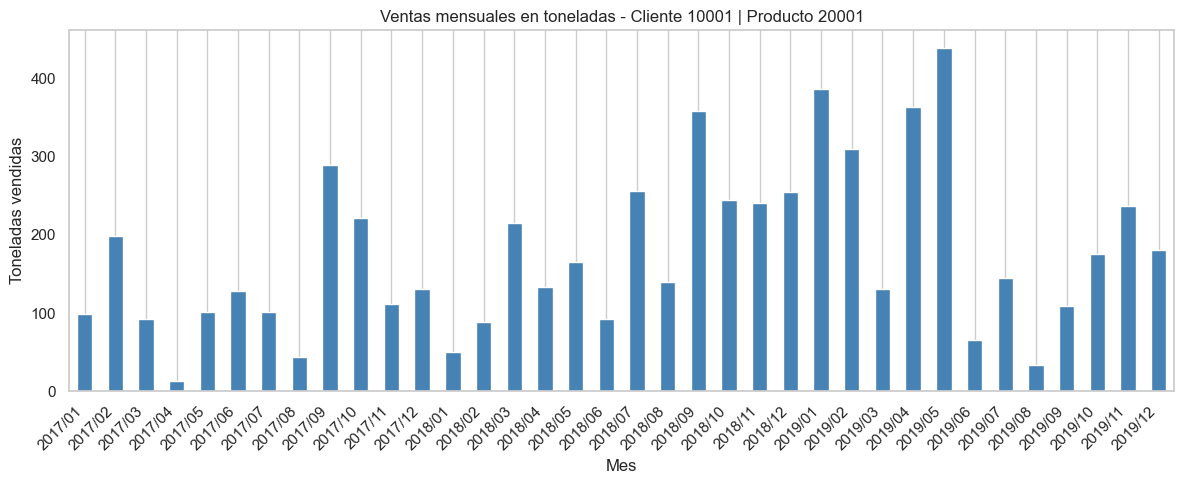

In [291]:
plot_ventas_cliente_producto(df, customer_id, '20001')

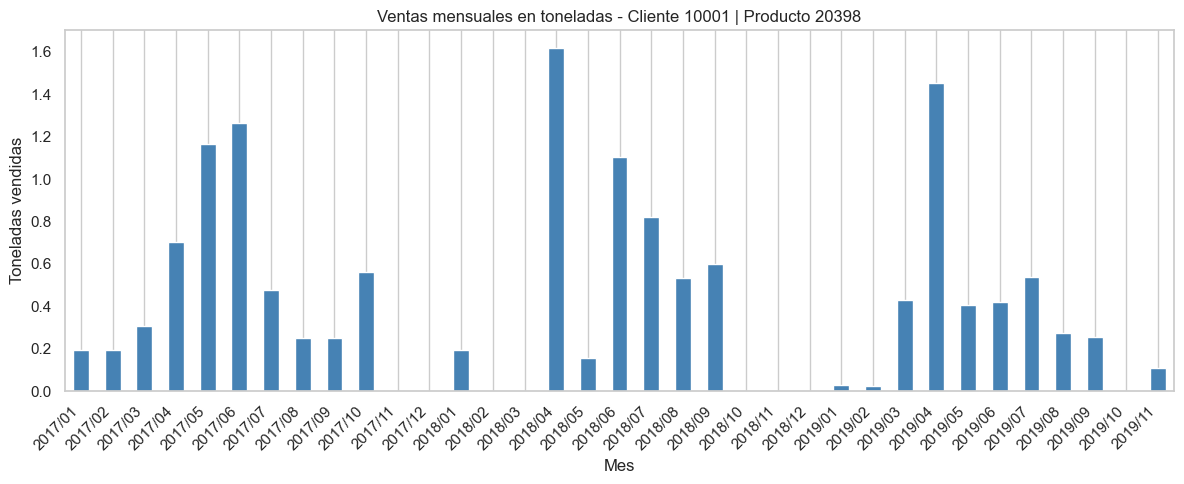

In [292]:
plot_ventas_cliente_producto(df, customer_id, '20398')

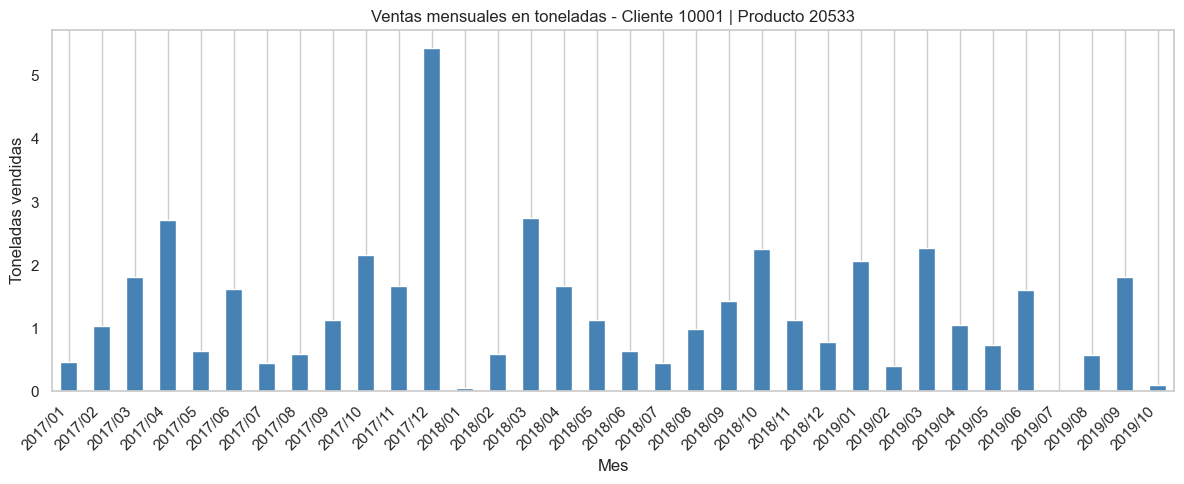

In [293]:
plot_ventas_cliente_producto(df, customer_id, '20533')

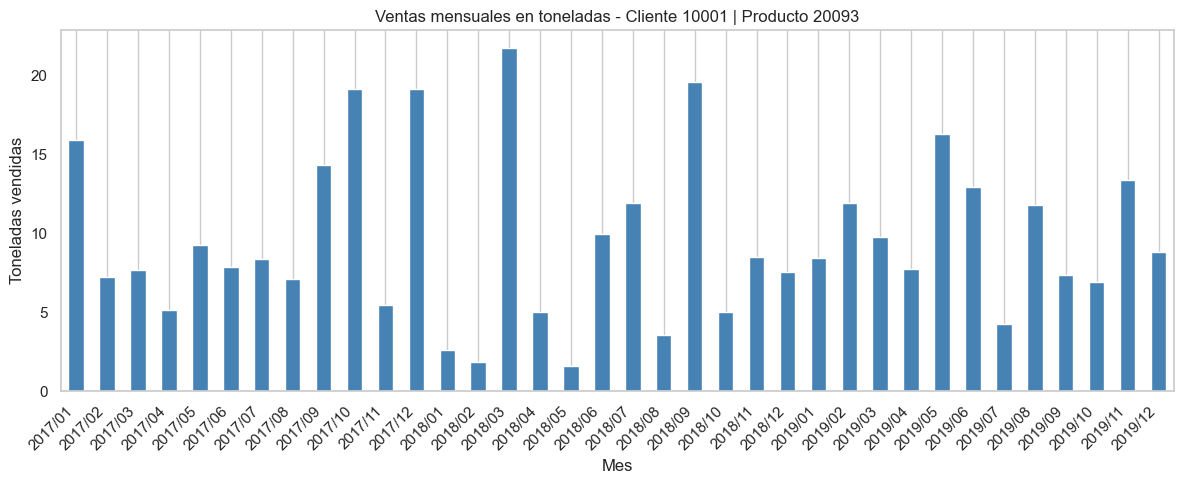

In [294]:
plot_ventas_cliente_producto(df, customer_id, '20093')